# Исследования рынка общепита в Москве для принятия решения об открытии нового заведения. 
Данное исследование проводится перед открытием кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. 
Цель исследование - ответить на вопрос "сможет ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?"

**Цель исследования**:
1. Выявить наиболее популярный тип заведения.
2. Определить каких заведений больше: сетевых или несетевых. 
3. Установить для какого вида объекта общественного питания характерно сетевое распространение.
4. Выяснить, что характерно для сетевых предприятий: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
5. Установить, какой вид общественного питания предоставляет в среднем самое большое количество посадочных мест?
6. Выявить в каких районах Москвы находятся топ-10 улиц с наибольшим количеством объектов общественного питания?
7. Выявить в каких районах Москвы находятся улицы с одним объектом общественного питания?

**Ход исследования**

Данные о заведениях общественного питания Москвы получим из файла `/datasets/rest_data.csv`. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных. 

Проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки выявим возможность исправить самые критичные ошибки данных. В конце напишем общий вывод и подготовим презентацию.
 
Таким образом, исследование пройдёт в несколько этапов:
 1. Изучение общей информации.
 2. Подготовка данных.
 3. Анализ данных.
 4. Общий вывод. 
 5. Презентация.

### Исследование рынка заведений общественного питания Москвы.

_____
###### Данное исследование разделим на несколько частей.

##### Часть 1. Изучение общей информации:
* [1. Изученеие файлов с данными, получение общей информации, загрузка библиотек.](#1-bullet)
##### Часть 2. Подготовка данных:
* [1. Приведение данных к нужным типам.](#19-bullet)
* [2. Нахождение и ликвидация пропусков.](#2-bullet)
* [2. Нахождение дубликатов.](#122-bullet)
* [3. Нахождение и исправление аномалий и ошибок.](#20-bullet)
##### Часть 3. Анализ данных:
* [1. Исследование соотношения видов объектов общественного питания по количеству. Построение графика.](#21-bullet)
* [2. Исследование соотношения сетевых и несетевых заведений по количеству. Построение графика.](#5-bullet)
* [3. Определение вида объекта общественного питания, для которого характерно сетевое распространение.](#6-bullet)
* [4. Определение, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?](#7-bullet)
* [5. Описание среднего количества посадочных мест для каждого вида объекта общественного питания. Определение вида предоставляющего в среднем самое большое количество посадочных мест. Построение графика.](#8-bullet)
* [6. Выделение в отдельный столбец информации об улице из столбца `address`.](#9-bullet)
* [7. Построение графика топ-10 улиц по количеству объектов общественного питания. Определение районов Москвы, в которых находятся эти улицы.](#10-bullet)
* [8. Определение числа улиц с одним объектом общественного питания. Определение районов Москвы, в которых находятся эти улицы.](#11-bullet)
##### Общий вывод
##### Презентация

## Изучение общей информации

<a id='1-bullet'></a>
### Изученеие файлов с данными, получение общей информации, загрузка библиотек.

In [1]:
import pandas as pd #импорт библиотеки Pandas
from plotly import graph_objects as go #импорт библиотеки graph_objects
import plotly.express as px #импорт библиотеки express
import seaborn as sns #импорт библиотеки seaborn
import matplotlib.pyplot as plt #импорт библиотеки matplotlib.pyplot
import re
import numpy as np #импорт библиотеки numpy
from io import BytesIO
import requests

In [2]:
rest_data = pd.read_csv("D:\\Programs\\rest_data")

In [3]:
rest_data.info() #получение общей информации

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Таблица rest_data:
* `id` — идентификатор объекта;
* `object_name` — название объекта общественного питания;
* `chain` — сетевой ресторан;
* `object_type` — тип объекта общественного питания;
* `address` — адрес;
* `number`— количество посадочных мест.

In [4]:
rest_data.head(5)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


## Подготовка данных

<a id='19-bullet'></a>
### Приведение данных к нужным типам.

Необходимо привести столбец `chain` к типу `bool`.

In [5]:
rest_data['chain'].unique()

array(['нет', 'да'], dtype=object)

In [6]:
rest_data = rest_data.replace({'chain':{'нет':False, 'да':True}}) #замена значений

<a id='2-bullet'></a>
### Нахождение и ликвидация пропусков.

In [7]:
rest_data.isna().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

В данных нет пропущенных значений

<a id='122-bullet'></a>
### Нахождение дубликатов.

In [8]:
rest_data.duplicated().sum()

0

In [9]:
rest_data['object_name'].sort_values().unique()

array(['1-ЫЙ МОСКОВСКИЙ КАДЕТСКИЙ КОРПУС', '1-й МОК',
       '100 личная столовая', ..., 'школа 775', 'школа 913', 'школа 919'],
      dtype=object)

Дубликатов нет.

<a id='20-bullet'></a>
### Нахождение и исправление аномалий и ошибок.

Проверим на ошибки тип заведений.

In [10]:
rest_data['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

Ошибок не было обнаружено. Следом проверим вместимость.

In [11]:
rest_data['number'].unique()

array([  48,   35,   95,   40,   50,  240,   10,   90,  150,  120,    5,
         24,  140,   32,  270,  320,    7,    2,  160,   20,   30,  110,
          6,  192,   65,   45,    4,  125,  100,   49,   63,   70,   22,
         56,   38,  220,   78,    3,   80,   46,   15,   96,   60,   47,
        180,  250,  200,   25,   12,   14,   16,  420,   98,   75,   34,
        216,   43,   54,  580,  159,    0,   28,   64,   67,   42,  124,
         82,   36,  114,    8,   71,   18,  158,   55,  196,   44,   76,
        144,   41,   26,   68,  143,  198,   79,    1,   86,  148,  190,
        202,  131,   52,   92,  300,   85,  102,   88,   84,  246,   81,
         94,   23,   37,   39,   99,   61,   11,  130,   74,  128,  106,
         58,  260,   27,   19,   29,   13,    9,  168,  350,   93,   33,
        105,  239,  104,   17,   62,  230,  132,   87,   89,  170,   83,
         21,  108,  210,   51,   53,  115,   66,  280,  126,   97,  356,
        156,  428,  380,  138,   72,  118,  139,  2

Проверим нет ли аномально больших по вместимости помещений.

In [12]:
rest_data['number'].max()

1700

In [13]:
rest_data[rest_data['number']==rest_data['number'].max()]

,id,object_name,chain,object_type,address,number
12723,199696,Arena by Soho Family,False,бар,"город Москва, Кутузовский проспект, дом 36, ст...",1700


При проверке вместимости заведения в интернете, было выявлено, что оно соответствует действительности.

Аномалий и ошибок в данных нет.

Данные готовы к анализу.

In [14]:
dublicate_data = rest_data[rest_data.duplicated(subset=['object_name', 'chain', 'object_type', 'address', 'number'])]

In [15]:
rest_data = rest_data[np.logical_not(rest_data['id'].isin(dublicate_data['id']))]

## Анализ данных

<a id='21-bullet'></a>
### Исследование соотношения видов объектов общественного питания по количеству. Построение графика.

In [16]:
object_type = rest_data['object_type'].value_counts().reset_index()

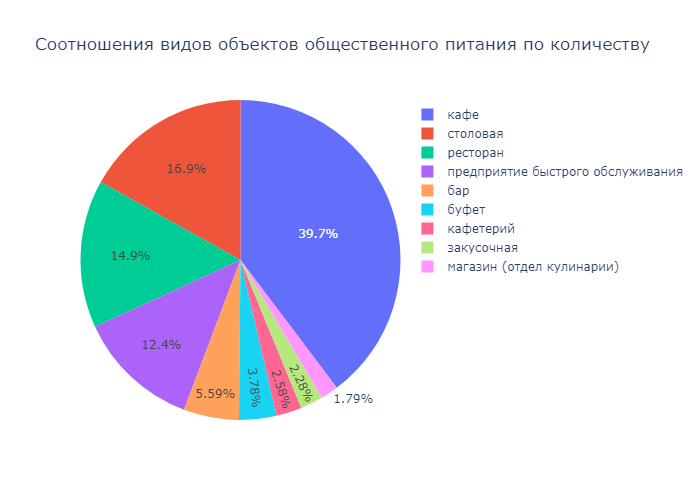

In [17]:
fig1 = go.Figure(data=[go.Pie(labels=object_type['index'], values=object_type['object_type'])])
fig1.update_layout(title="Cоотношения видов объектов общественного питания по количеству")
fig1.show('png')

Больше всего кафе. В след за ним идут столовые, рестораны и предприятия быстрого обслуживания.

<a id='5-bullet'></a>
### Исследование соотношения сетевых и несетевых заведений по количеству. Построение графика.

In [18]:
chain = rest_data['chain'].value_counts().reset_index()

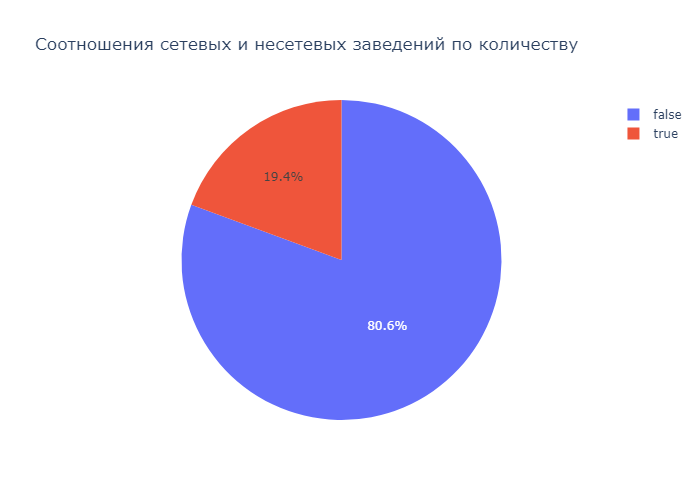

In [19]:
fig2 = go.Figure(data=[go.Pie(labels=chain['index'], values=chain['chain'])])
fig2.update_layout(title="Cоотношения сетевых и несетевых заведений по количеству")
fig2.show('png')

Больше всего несетевых заведений.

<a id='6-bullet'></a>
### Определение вида объекта общественного питания, для которого характерно сетевое распространение.

In [20]:
type_chain = rest_data.pivot_table(values='chain', index='object_type', aggfunc=['sum','count']).reset_index()

In [21]:
type_chain.columns = ['object_type','sum','count']

In [22]:
type_chain['ratio'] = type_chain['sum']/type_chain['count']

In [23]:
type_chain.sort_values(by='ratio', ascending=False)

,object_type,sum,count,ratio
6,предприятие быстрого обслуживания,788,1898,0.415174
5,магазин (отдел кулинарии),78,273,0.285714
7,ресторан,543,2282,0.237949
3,кафе,1396,6071,0.229946
2,закусочная,56,349,0.160458
4,кафетерий,52,395,0.131646
0,бар,37,855,0.043275
1,буфет,11,577,0.019064
8,столовая,3,2584,0.001161


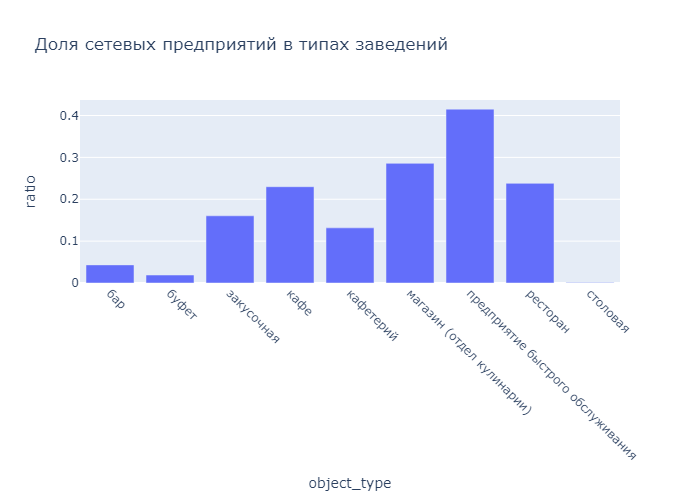

In [24]:
fig3 = px.bar(
    type_chain,
    x='object_type',
    y='ratio',
    title='Доля сетевых предприятий в типах заведений',
)
fig3.update_xaxes(tickangle=45)
fig3.show('png') 

Наиболее характерно сетевое распространение для преприятий быстрого обслуживания.

<a id='7-bullet'></a>
### Определение, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [25]:
chain_rest = rest_data.query('chain == True')

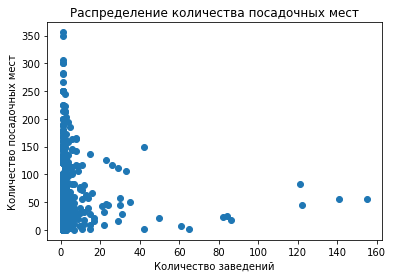

In [26]:
chain_number = chain_rest.groupby('object_name', as_index=False).agg({'id': 'nunique','number':'mean'}).reset_index(drop=True)
chain_number.columns = ['object_name','rest_sum','number_mean']
plt.scatter(chain_number['rest_sum'],chain_number['number_mean'])
plt.title('Распределение количества посадочных мест')
plt.xlabel('Количество заведений')
plt.ylabel('Количество посадочных мест')
plt.show()

In [27]:
def chain_group(row): # создание функции для категоризации сетевых заведений по количеству предприятий и посадочных мест
    try:
        if row['rest_sum'] > np.percentile(chain_number['rest_sum'].sort_values().unique(),  50) and row['number_mean'] > np.percentile(chain_number['number_mean'].sort_values().unique(),  50):
            return 'много заведений и много мест'
        if row['rest_sum'] < np.percentile(chain_number['rest_sum'].sort_values().unique(),  50) and row['number_mean'] < np.percentile(chain_number['number_mean'].sort_values().unique(),  50):
            return 'мало заведений и мало мест'
        if row['rest_sum'] > np.percentile(chain_number['rest_sum'].sort_values().unique(),  50) and row['number_mean'] < np.percentile(chain_number['number_mean'].sort_values().unique(),  50):
            return 'много заведений и мало мест'
        if row['rest_sum'] < np.percentile(chain_number['rest_sum'].sort_values().unique(),  50) and row['number_mean'] > np.percentile(chain_number['number_mean'].sort_values().unique(),  50):
            return 'мало заведений и много мест'
    except(ValueError, ZeroDivisionError):
        display(row)
        return NaN 

In [28]:
chain_number['category'] = chain_number.apply(chain_group,axis=1) #применение функции к таблице
chain_number['category'].value_counts()

мало заведений и мало мест      411
мало заведений и много мест     290
много заведений и мало мест      15
много заведений и много мест      8
Name: category, dtype: int64

Для сетевых заведений характерно мало заведений и много посадочных мест

<a id='8-bullet'></a>
### Описание среднего количества посадочных мест для каждого вида объекта общественного питания. Определение вида предоставляющего в среднем самое большое количество посадочных мест. Построение графика.

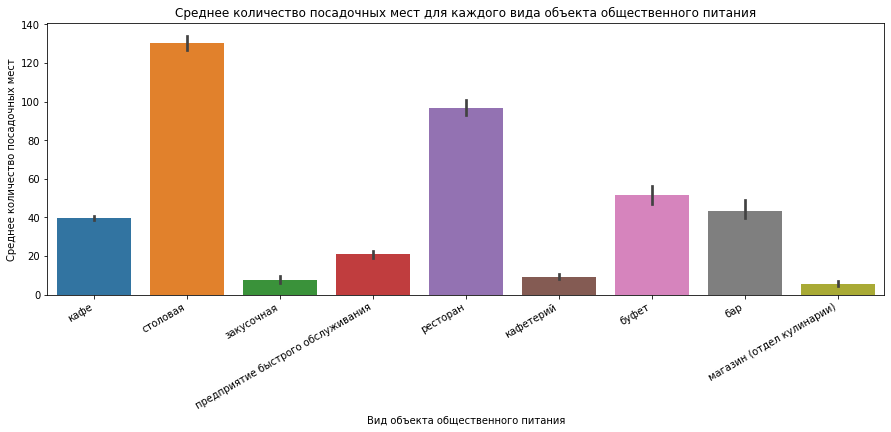

In [29]:
plt.figure(figsize=(15,5))
sns.barplot(x='object_type', y='number', data=rest_data)
plt.xticks(rotation=30, ha='right')
plt.title('Среднее количество посадочных мест для каждого вида объекта общественного питания')
plt.xlabel('Вид объекта общественного питания')
plt.ylabel('Среднее количество посадочных мест')
plt.show()

В среднем самое большое количество посадочных мест у столовых. В след за ними - рестораны.

<a id='9-bullet'></a>
### Выделение в отдельный столбец информации об улице из столбца `address`.

In [30]:
rest_data

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,True,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,True,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,True,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,True,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,True,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [31]:
words = ['улица','ул','переулок','шоссе','проспект','площадь','проезд',
         'село','аллея','бульвар','набережная','тупик','линия']

str_pat = r".*,\s*\b([^,]*?(?:{})\b[^,]*)[,$]+".format("|".join(words))

rest_data["street"] = rest_data["address"].str.extract(str_pat, flags=re.I)

<a id='10-bullet'></a>
### Построение графика топ-10 улиц по количеству объектов общественного питания. Определение районов Москвы, в которых находятся эти улицы.

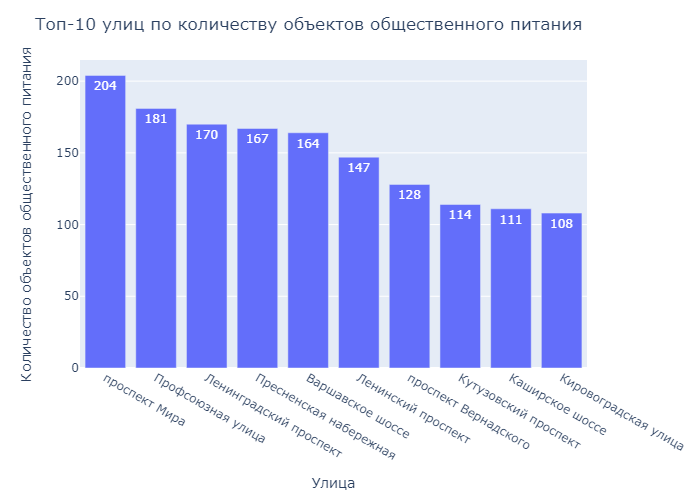

In [32]:
all_street = rest_data.groupby('street').agg({'id':'nunique'}).reset_index().sort_values(by='id', ascending=False)
top_street=all_street.head(10)
fig_top = px.bar(top_street, x="street", y="id", text="id")
fig_top.update_layout(title="Топ-10 улиц по количеству объектов общественного питания",
                  xaxis_title="Улица",
                  yaxis_title="Количество объектов общественного питания")
fig_top.show('png')

In [33]:
spreadsheet_id = '11gpdmIRs0HzNFoREN2s9XAGf5a13OcwnZChp1hqwVDs'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
moscow_street = pd.read_csv(BytesIO(r.content))
moscow_street.head(5)

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [34]:
top_street

,street,id
1418,проспект Мира,204
1009,Профсоюзная улица,181
683,Ленинградский проспект,170
993,Пресненская набережная,167
397,Варшавское шоссе,164
686,Ленинский проспект,147
1414,проспект Вернадского,128
673,Кутузовский проспект,114
596,Каширское шоссе,111
603,Кировоградская улица,108


In [35]:
moscow_street[moscow_street['streetname'].isin(top_street['street'])]['area'].unique()

array(['Пресненский район', 'Район Дорогомилово', 'Район Фили-Давыдково',
       'Район Проспект Вернадского', 'Район Раменки',
       'Район Тропарево-Никулино', 'Район Аэропорт', 'Район Беговой',
       'Хорошевский район', 'Район Сокол', 'Алексеевский район',
       'Ярославский Район', 'Район Марьина роща', 'Останкинский район',
       'Район Ростокино', 'Район Свиблово', 'Район Чертаново Центральное',
       'Район Чертаново Северное', 'Район Чертаново Южное',
       'Донской район', 'Район Москворечье-Сабурово',
       'Район Нагатино-Садовники', 'Нагорный район',
       'Район Орехово-Борисово Южное', 'Район Орехово-Борисово Северное',
       'Академический район', 'Район Черемушки', 'Район Гагаринский',
       'Район Ясенево', 'Район Коньково', 'Ломоносовский район',
       'Обручевский район', 'Район Северное Бутово', 'Район Теплый Стан',
       'Район Южное Бутово', 'Район Якиманка', 'Мещанский район'],
      dtype=object)

Данные улицы находятся в районах ЦАО, ЮЗАО, САО, ЮАО, ЗАО. Самый популряный район ЦАО.

<a id='11-bullet'></a>
### Определение числа улиц с одним объектом общественного питания. Определение районов Москвы, в которых находятся эти улицы.

In [36]:
only_one = all_street[all_street['id']==1]
only_one['street'].count()

551

In [37]:
moscow_street[moscow_street['streetname'].isin(only_one['street'])]['area'].value_counts()

Таганский район            27
Район Хамовники            26
Басманный район            25
Тверской район             20
Пресненский район          19
                           ..
Район Марьино               1
Район Ивановское            1
Район Восточный             1
Район Западное Дегунино     1
Район Южное Медведково      1
Name: area, Length: 100, dtype: int64

In [38]:
top_5_area = moscow_street[moscow_street['streetname'].isin(only_one['street'])]['area'].value_counts().reset_index().head(5)
top_5_area.columns=['area','sum_street']

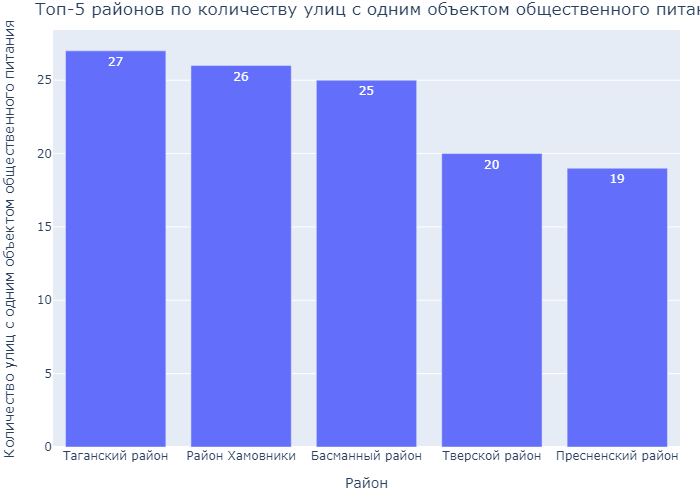

In [39]:
fig_top_5_area = px.bar(top_5_area, x="area", y="sum_street", text="sum_street")
fig_top_5_area.update_layout(title="Топ-5 районов по количеству улиц с одним объектом общественного питания",
                  xaxis_title="Район",
                  yaxis_title="Количество улиц с одним объектом общественного питания",
                  margin=dict(l=20, r=20, t=30, b=20))
fig_top_5_area.show('png')

551 улица с одним объектом общественного питания. Можно сделать вывод, что эти улицы находятся практически во всех районах города.

## Общий вывод

На основе данных было построена диаграмма соотношения видов объектов общественного питания по количеству. На ее основе был сделан вывод, что самым популярным типом заведения является кафе.

Далее было исследовано соотношение сетевых и несетевых заведений по количеству. Также была построена диаграмма и выявлено, что несетевых заведений больше сетевых.

Затем было определено для какого вида общественного питания характерно сетевое распространение. Оно характерно для преприятий быстрого обслуживания. Такой вывод был сделан на основе столбчатой диаграммы.

В след за этим была выяснено, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест? Для этого данные были сгруппированны по названию сети и посчитано количество заведений сети и среднее количество посадочных мест в одном заведении. Далее был построен график разброса, на котором преобладает мало заведений с большим количеством посадочных мест. Также каждое заведение было разбито  на 4 категории: 
1. много заведений, мало мест
2. много заведений, много мест
3. мало заведений, мало мест
4. мало заведений, много мест.

Определение малого или большого количества заведений/посадочных мест было по 50 процентилю среди уникальных значений сгруппированных данных о количестве заведений/посадочных мест. Фаворитом среди двух категорий, заявленных в начале, оказалась - "мало заведений, много мест". Однако, лидером среди 4 категорий является - "мало заведений и мало мест".

Далее в ходе исследования было определенно среднее количество посадочных мест для каждого вида объекта общественного питания. По столбчатой диаграмме наибольшее количество посадочных мест оказалось у столовых.

Затем было выявлено топ 10 улиц по количеству заведений и определены районы, через которые они проходят.

После этого были выявлены улицы с один заведением и также определены районы. Топ-5 районов отображены на графике.

**Рекомендации:**

Вид заведения рекомендуется выбрать в формате кафе, так как это наиболее популярный объект общественного питания. В ходе исследования было выявлено, что среднее количество мест равно 40. Поэтому целесообразно будет выбрать 40 посадочных мест для заведения. Самый популярный район оказался ЦАО, так что рекомендуется выбрать именно этот район. Не рекомендуется организовывать сеть кафе, так как доля сетевых кафе среди всех заведений данного формата мала. К тому же, доля сетевых заведений среди всех объектов общественного питания составляет лишь примерно 19 процентов. 

## Презентация

Презентация: https://docs.google.com/presentation/d/1hDAhr1r8eilMeI72cexYIJDfCd9XsDuC-mtBDknjBHA/edit?usp=sharing